In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
data = pd.read_csv("/home/coberndorm/Documents/Semestre_IX/ArtificialIntelligence/Trabajo_2/LeNet/numbers.csv")
data = data.drop(columns=['Unnamed: 0'], axis=1)
data = data[data["label"]!="X"]
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.890196,0.615686,0.0,0.0,0.462745,1.0,4
1,1.0,1.0,1.0,1.0,0.980392,0.890196,0.890196,0.890196,0.890196,0.890196,...,1.000000,1.000000,0.717647,0.019608,0.000000,0.0,0.0,0.572549,1.0,7
2,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.462745,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,7
3,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.337255,0.917647,0.917647,1.0,1.0,1.000000,1.0,2
4,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.976471,0.862745,0.862745,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.521569,0.941176,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,6
789,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.925490,0.784314,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,3
790,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,0
791,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.784314,0.262745,...,0.062745,0.698039,0.917647,1.000000,1.000000,1.0,1.0,1.000000,1.0,9


In [3]:
set(data.iloc[:,-1].values)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [4]:
def partitioning(datos,size_S,size_T):
    """ 
        Método que hace el partitioning de los datos en el set de S, training, testing y validation
        Recibe:
            1. datos: Datos al cual se le va a hacer el partitioning
            2. Size_S: Tamaño del set S
            3. Size_T: Tamaño del set T (training)
        Entrega:
            1. S: Set S
            2. V: set de validación V
            3. T: set de training T
            4. t: set de testing t
    """
    indices_datos = np.arange(len(datos))

    indices_S = np.random.choice(indices_datos, size=int(round(len(datos)*size_S)),replace=False)
    indices_V = np.setdiff1d(indices_datos, indices_S)
    indices_T = np.random.choice(indices_S, size=int(round(len(datos)*size_T)),replace=False)
    indices_t = np.setdiff1d(indices_S, indices_T)

    S= datos.iloc[indices_S]
    
    V= datos.iloc[np.random.choice(indices_V, size=len(indices_V),replace=False)]
    T= datos.iloc[indices_T]
    t= datos.iloc[np.random.choice(indices_t, size=len(indices_t),replace=False)]

    return S,V,T,t

In [5]:
S,V,T,t = partitioning(data,0.8,0.6)

In [6]:
# Normalise all columns
# The network will converge faster with normalized values.
train_x = T.iloc[:,:-1]
valid_x = t.iloc[:,:-1]
train_x = train_x.apply(lambda x : x / 255)
valid_x = valid_x.apply(lambda x: x / 255)
len(T), len(t)

(428, 143)

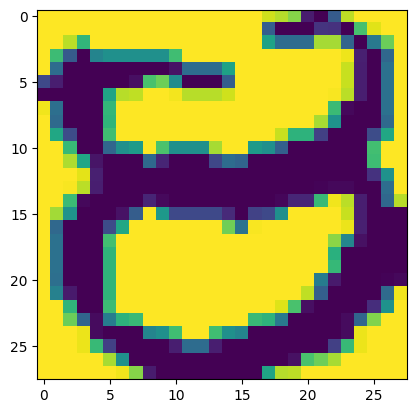

In [7]:
# Example training data
plt.imshow(train_x.iloc[87].values.reshape(28, 28))

## Datos

In [8]:
import idx2numpy
import numpy as np

In [9]:
# Especifica la ruta al archivo IDX-UBYTE que deseas cargar
archivo_idx = "/home/coberndorm/Documents/Semestre_IX/ArtificialIntelligence/Trabajo_2/LeNet/train-images.idx3-ubyte"

# Utiliza idx2numpy para cargar el archivo IDX en una matriz NumPy
train_x = idx2numpy.convert_from_file(archivo_idx)
train_labels = idx2numpy.convert_from_file("/home/coberndorm/Documents/Semestre_IX/ArtificialIntelligence/Trabajo_2/LeNet/train-labels.idx1-ubyte")
test_x = idx2numpy.convert_from_file("/home/coberndorm/Documents/Semestre_IX/ArtificialIntelligence/Trabajo_2/LeNet/t10k-images.idx3-ubyte")
test_labels = idx2numpy.convert_from_file("/home/coberndorm/Documents/Semestre_IX/ArtificialIntelligence/Trabajo_2/LeNet/t10k-labels.idx1-ubyte")
class_names = list(set(train_labels))

In [30]:
import matplotlib.pyplot as plt

def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        #plt.xlabel(class_names[train_labels[i]])
    plt.show()

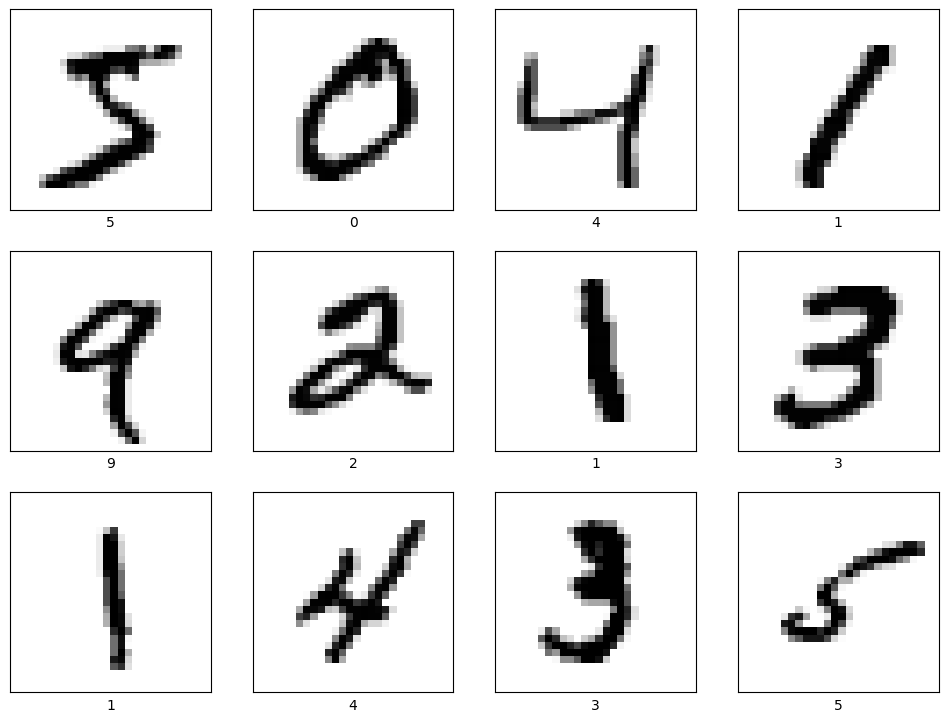

In [11]:
show_images(train_x, class_names, train_labels)

In [12]:
max_pixel_value = 255
train_images = train_x / max_pixel_value
test_images = test_x / max_pixel_value

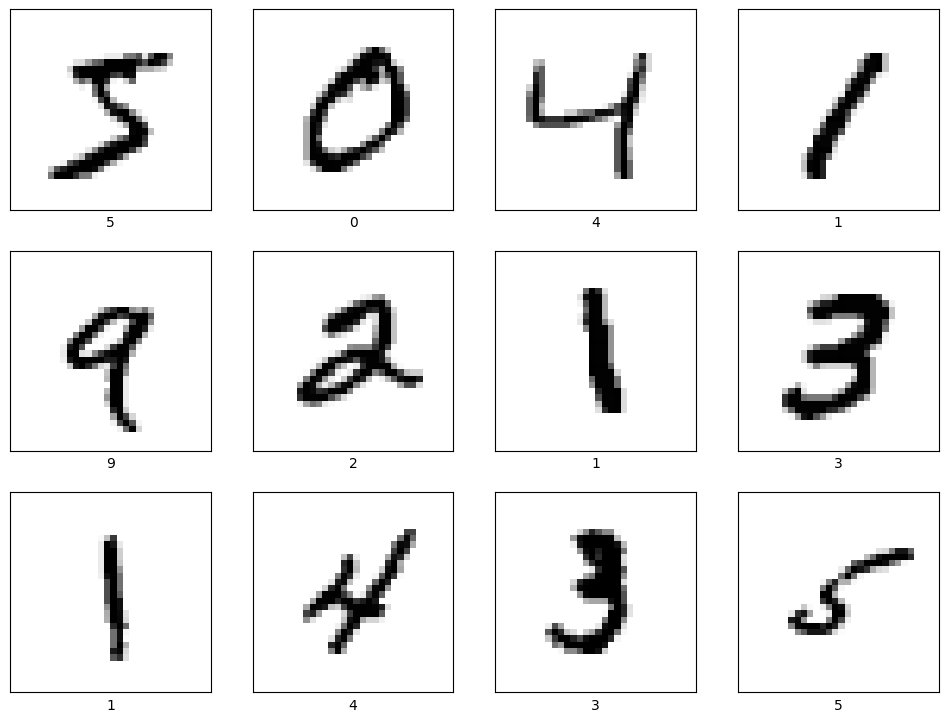

In [13]:
#train_images = train_images.reshape(6000,32,32)
train_images = np.pad(train_images, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
show_images(train_images, class_names, train_labels)

In [14]:
test_images = np.pad(test_images, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)

In [15]:
test_images.shape

(10000, 32, 32)

In [16]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32,32,1)
FILTER1_SIZE = 6
FILTER2_SIZE = 16
FILTER_SHAPE = (5, 5)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE,activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [18]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/30


2023-09-15 13:08:39.046907: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.


1875/1875 [==============================] - 15s 8ms/step - loss: 0.1746 - accuracy: 0.9480 - precision: 0.9662 - recall: 0.9320 - val_loss: 0.0552 - val_accuracy: 0.9825 - val_precision: 0.9845 - val_recall: 0.9804
Epoch 2/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0600 - accuracy: 0.9814 - precision: 0.9838 - recall: 0.9798 - val_loss: 0.0419 - val_accuracy: 0.9862 - val_precision: 0.9881 - val_recall: 0.9851
Epoch 3/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0445 - accuracy: 0.9863 - precision: 0.9876 - recall: 0.9851 - val_loss: 0.0343 - val_accuracy: 0.9876 - val_precision: 0.9890 - val_recall: 0.9870
Epoch 4/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0327 - accuracy: 0.9896 - precision: 0.9905 - recall: 0.9887 - val_loss: 0.0380 - val_accuracy: 0.9866 - val_precision: 0.9878 - val_recall: 0.9861
Epoch 5/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0255 - accuracy: 0.9915 

In [22]:
def show_performance_curve(training_result, metric, metric_label):
    
	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]
    
	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    
	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='green')
            	 
	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

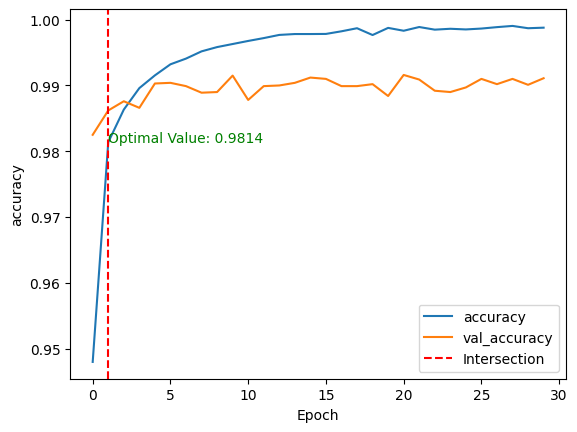

In [24]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

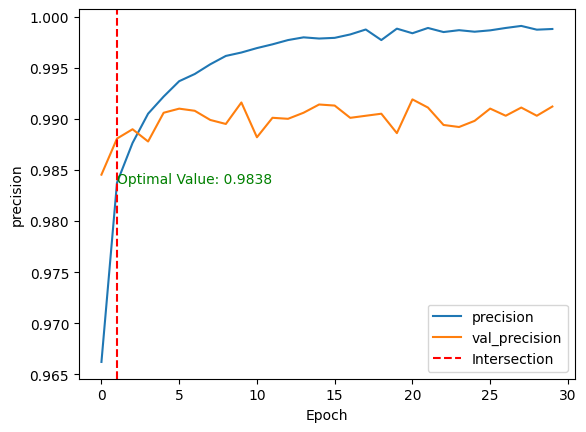

In [25]:
show_performance_curve(training_history, 'precision', 'precision')

313/313 [==============================] - 2s 5ms/step


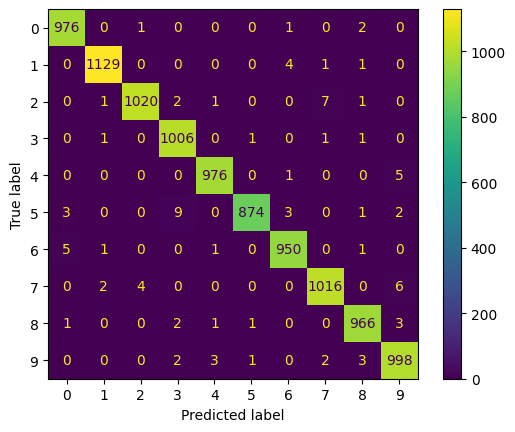

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [27]:
validation= data.iloc[:,:-1].values
validation = validation.reshape(714,28, 28)

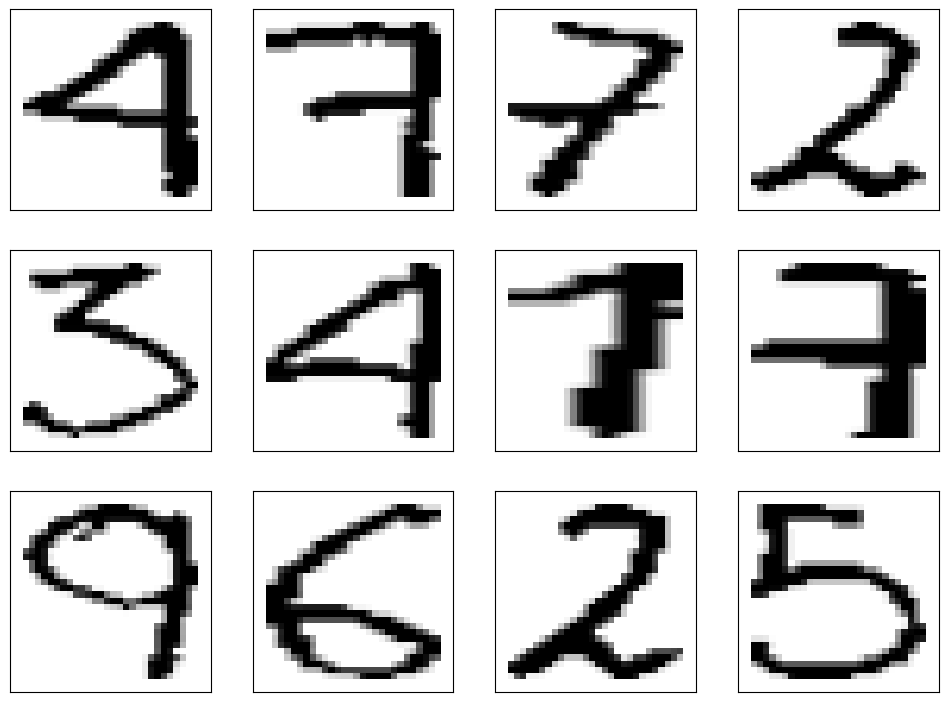

In [31]:
validation_images =  (1-validation) / 1
validation_images = np.pad(validation_images, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
show_images(validation_images, [], [])

In [32]:
predictions = model.predict(validation_images)

23/23 [==============================] - 0s 6ms/step


In [33]:
predicted_classes = predictions.argmax(axis=-1)

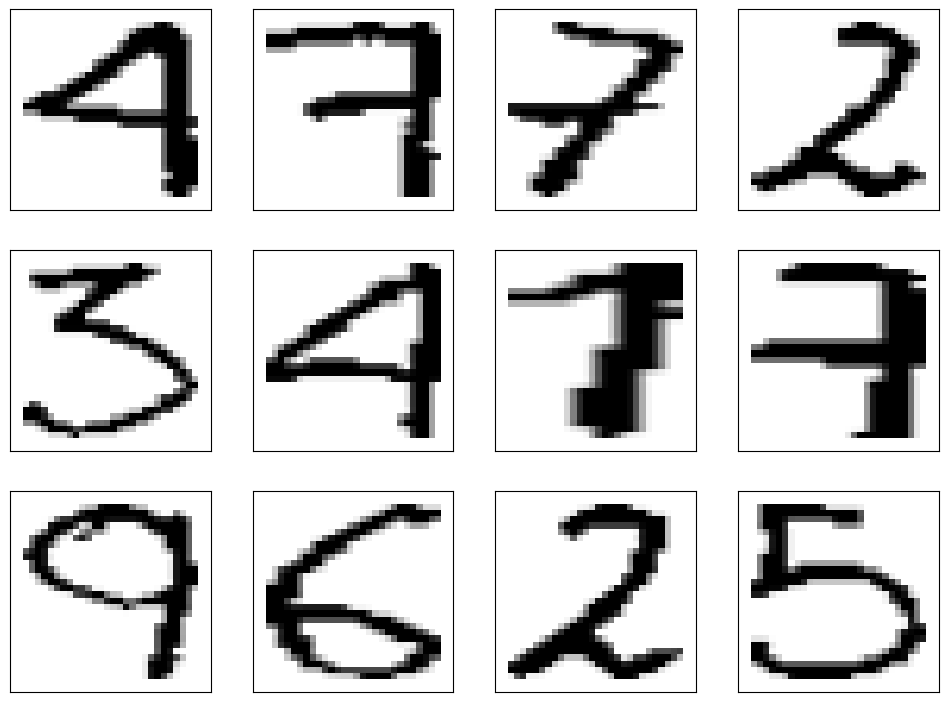

In [34]:
show_images(validation_images,class_names,predicted_classes)

In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix([int(i) for i in data.iloc[:,-1].values], predicted_classes)

print(matriz_confusion)


[[30  0  6 27  0  4  4  0  1  2]
 [ 0  4  8 15  8  1  1 29  0  1]
 [ 3  2 63  1  0  1  1  4  0  2]
 [ 0  0 11 65  4 54  0  4  2  1]
 [ 2  0  6  0 42  2 12 13  0  0]
 [ 0  0  1 13  0 52  0  3  1  1]
 [ 1  0 30  2  0 13 16  0  1  0]
 [ 0  1 12  0 17  0  0 19  0  0]
 [ 0  0  6  3  6  7  1  8 18  0]
 [ 0  1  3  0 20  0  0 19  0  3]]


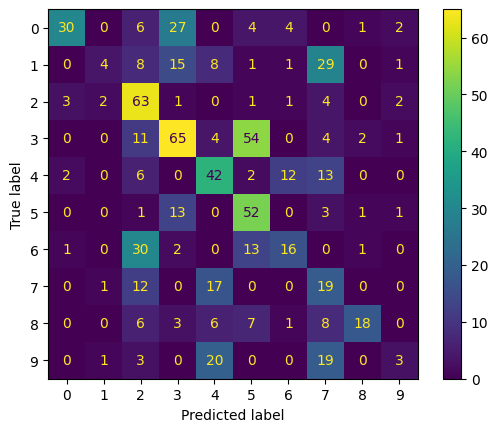

In [36]:
cmd = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()